<a href="https://colab.research.google.com/github/Skp80/ComputerVision/blob/main/Notebooks/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb
from skimage import io

In [18]:
!wget https://raw.githubusercontent.com/Skp80/ComputerVision/main/data/musk.jpg
img = read('musk.jpg', 1)

--2021-01-26 08:14:04--  https://raw.githubusercontent.com/Skp80/ComputerVision/main/data/musk.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33394 (33K) [image/jpeg]
Saving to: ‘musk.jpg’

musk.jpg            100%[===================>]  32.61K  --.-KB/s    in 0.003s  

2021-01-26 08:14:04 (12.5 MB/s) - ‘musk.jpg’ saved [33394/33394]



In [19]:
segments_fz = felzenszwalb(img, scale=200)

2021-01-26 08:14:19.335 | INFO     | torch_snippets.loader:subplots:400 - plotting 2 images in a grid of 1x2 @ (10, 10)


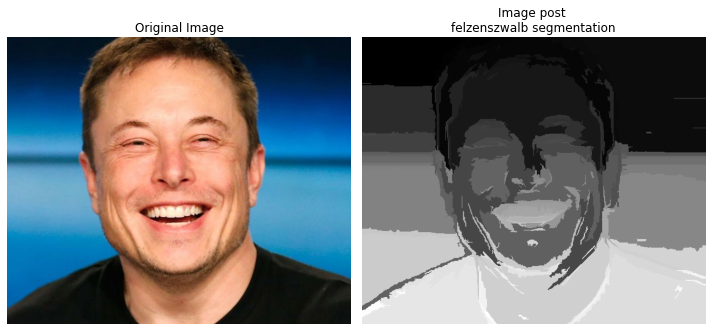

In [20]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [21]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [22]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
!wget https://raw.githubusercontent.com/Skp80/ComputerVision/main/data/musk.jpg
img = read('musk.jpg', 1)

--2021-01-26 08:14:56--  https://raw.githubusercontent.com/Skp80/ComputerVision/main/data/musk.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33394 (33K) [image/jpeg]
Saving to: ‘musk.jpg.1’

musk.jpg.1          100%[===================>]  32.61K  --.-KB/s    in 0.003s  

2021-01-26 08:14:56 (12.0 MB/s) - ‘musk.jpg.1’ saved [33394/33394]



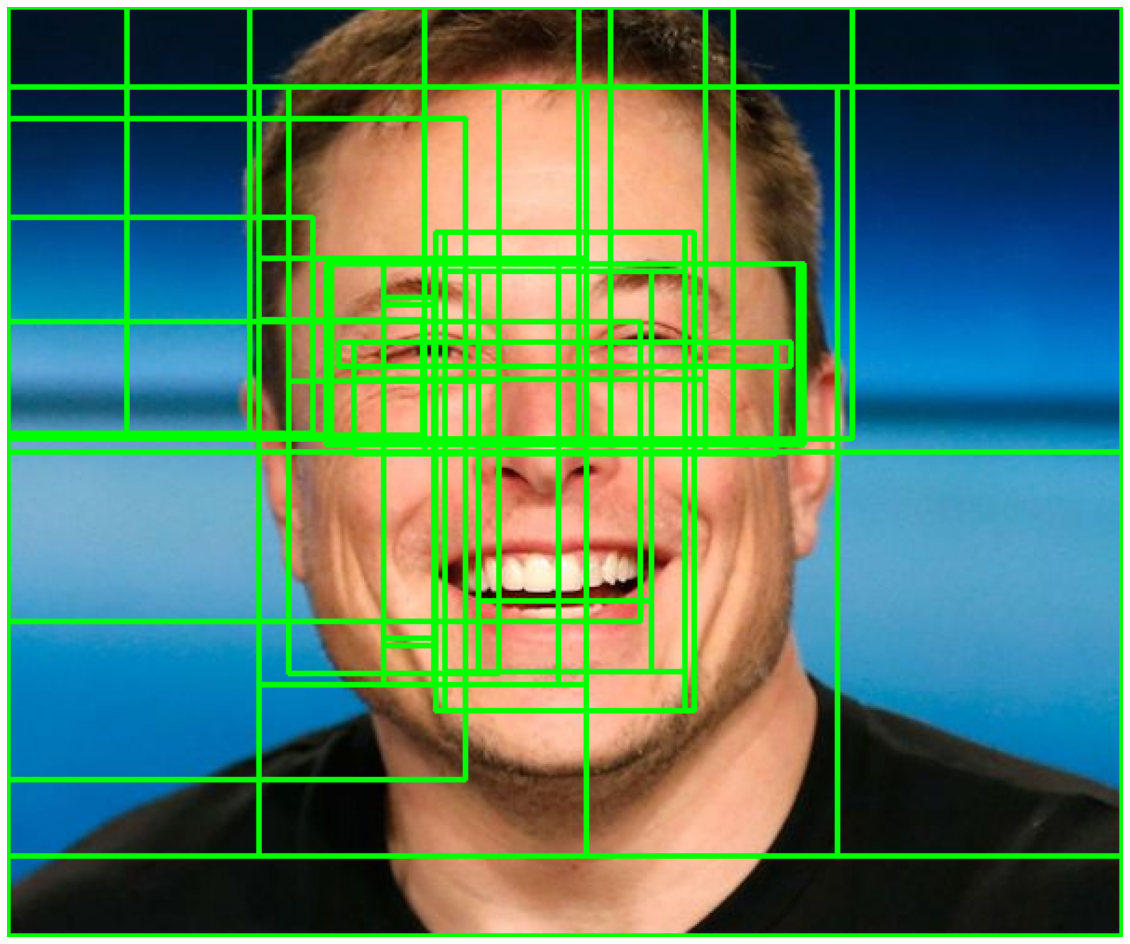

In [23]:
candidates = extract_candidates(img)
show(img, bbs = candidates)